<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Sixth_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Follow the article: **Step-by-Step Guide: Text Classification with 20 Newsgroups Dataset**

 https://medium.com/@alexrodriguesj/step-by-step-guide-text-classification-with-20-newsgroups-dataset-ecf31562afd9

We will walk through the process of building a text classification model using the [20 Newsgroups dataset](https://scikit-learn.org/stable/datasets/real_world.html#the-20-newsgroups-text-dataset). This dataset is a classic benchmark for text classification and is widely used to test machine learning algorithms.

What is text classification?

Text classification is the process of assigning predefined categories to text documents. It is a common task in natural language processing (NLP) and has many applications, such as spam detection, sentiment analysis, and topic labeling.

We will use the 20 Newsgroups dataset, which contains approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. The dataset is available in the sklearn.datasets module of Scikit-learn.

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Step 1: Install Required Libraries
First, we need to install the necessary libraries:

In [ ]:
!pip install pandas scikit-learn nltk matplotlib seaborn

# Step 2: Import Libraries

**pandas**: a powerful data manipulation and analysis library for Python

**sklearn.model_selection.train_test_split**: A utility function from Scikit-learn that splits arrays or matrices into random train and test subsets.

**sklearn.feature_extraction.text.TfidfVectorizer**: A module from Scikit-learn used to convert a collection of raw documents to a matrix of TF-IDF features. This transformation is essential for preparing text data for machine learning algorithms.

**sklearn.linear_model.LogisticRegression**: This is an implementation of logistic regression in Scikit-learn, a popular algorithm for binary classification tasks.

**sklearn.metrics.accuracy_score, classification_report, confusion_matrix**: These are evaluation metrics from Scikit-learn.

**nltk**: Natural Language Toolkit (nltk) is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English.

**nltk.corpus.stopwords**: Part of the NLTK library, this module provides a list of common stopwords (like “the”, “is”, “in”, etc.) for various languages. These are typically removed in text processing tasks to reduce noise.

**re**: The regular expressions library in Python, which provides a way to search for and manipulate strings based on patterns. It is often used for text preprocessing tasks such as tokenization or cleaning text data.

**matplotlib.pyplot**: A plotting library used for creating static, animated, and interactive visualizations in Python. pyplot is a state-based interface to Matplotlib that provides a MATLAB-like interface for creating plots and charts.

**seaborn**: A data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics, making it easier to create complex visualizations with less code.


In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer
)


# Step 3: Load the Dataset

We load the 20 Newsgroups dataset using the fetch_20newsgroups function from Scikit-learn.

In [ ]:
# your student code numbers
RAND=1234

In [ ]:
# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=RAND)

In [ ]:
# The magic part – real class names
class_names = newsgroups.target_names
print(class_names)  # just to see them
# → ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', ...]

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Step 4: Text Preprocessing

Text preprocessing is a crucial step in any text classification task. It involves cleaning and transforming the raw text into a format that can be used by machine learning models.

Here’s a function to preprocess the text:

In [ ]:
# Text preprocessing function
def preprocess_text(text):
    # 1. Remove headers FIRST
    text = re.sub(r'(?m)^(From|Subject|Organization|Lines|NNTP-Posting-Host|Distribution|Keywords|Reply-To|X-.*):.*\n?', '', text)

    # 2. Remove emails and URLs BEFORE removing punctuation
    text = re.sub(r'\S+@\S+', ' ', text)           # catches gizwt@anything
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', ' ', text)
    text = re.sub(r'http[s]?://\S+', ' ', text)
    text = re.sub(r'www\.\S+', ' ', text)

    # 3. Now safely strip non-letters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip().lower()

    # 4. Stopwords + short words
    tokens = [w for w in text.split() if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

**Lowercasing**: Converts all text to lowercase to maintain uniformity.

**Remove Special Characters and Numbers**: Cleans the text by removing unwanted characters and numbers.

**Stop Words**: Common words (like “and”, “the”) that do not contribute much to the meaning and are removed to reduce noise.

In [ ]:
newsgroups_data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
newsgroups_data['text'][0]

In [ ]:
# Apply preprocessing
newsgroups_data = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})
newsgroups_data['text'] = newsgroups_data['text'].apply(preprocess_text)

In [ ]:
# Remove the 5 most common junk words completely from the text
junk_words = ['message', 'clh', 'reply', 'apr', 'acs', 'nntp', 'gvlf' , 'article', 'peter', 'clark', 'gary', 'dare', 'writes', 'bill', 'mayne', 'dan', 'Lawrence', 'Bissell', 'tom', 'Albrecht', 'crcnis', 'pqvusinnmjm', 'ted', 'frank',  'naren', 'bala', 'henry', 'spencer',  'edu']

import re
for word in junk_words:
    newsgroups_data['text'] = newsgroups_data['text'].str.replace(rf'\b{word}\b', '', regex=True, case=False)


In [ ]:
newsgroups_data['text'][0]

In [ ]:
# find top 20 words in Newsgroup by roup_id 0-19
Group_id=0
train_neg_df = newsgroups_data[newsgroups_data['target'] == Group_id]

count_vectorizer = CountVectorizer(analyzer='word', stop_words='english', max_df=0.8 ,min_df=100)
bag_of_words = count_vectorizer.fit_transform(train_neg_df['text'])
sum_words = bag_of_words.sum(axis=0)

words_freq = [
    (word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()
]

words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

x, y = zip(*words_freq[:30])

plt.figure(figsize=(12,5))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('Top30 Words used in news group : ' + newsgroups.target_names[Group_id])

# Step 5: Split Data into Train and Test Sets

We split the dataset into training and testing sets.

In [ ]:
#The RAND variable is your student ID numbers RAND="bcde"
RAND = 1234

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(newsgroups_data['text'], newsgroups_data['target'], test_size=0.2, stratify=newsgroups_data['target'] , random_state=RAND)

## Step 5.1: Convert text by CountVectorizer and do classification

In [ ]:
#vect = CountVectorizer().fit(X_train)
vect = CountVectorizer(binary=False, max_df=0.70, min_df=10, max_features=14000, stop_words="english").fit(X_train)

X_train_cv = vect.transform(X_train)
X_test_cv = vect.transform(X_test)
print("X_train:\n{}".format(repr(X_train_cv)))

In [ ]:
print("Vocabulary: ", vect.vocabulary_)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nb_model = MultinomialNB()
nb_model.fit(X_train_cv, y_train)
y_pred = nb_model.predict(X_test_cv)
scores_nb=accuracy_score(y_test,y_pred)
print("Base line accuracy = ", scores_nb)

In [ ]:
# Confusion matrix visualization

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)

# This is the key line – use class_names on both axes
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar=False)

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix – 20 Newsgroups', fontsize=16)

# Rotate labels so they fit nicely
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

**The task 1.**
Depending on the last digit of your student Internal code (abcde) build an "optimal **model**" (i.e. better that the base line) classifier by variating specific *parameter*. Plot the accuracy cure depending on manipulated variable.
The RAND variable is your student ID numbers RAND="bcde".

0. CalibratedClassifierCV(LinearSVC(C=1.0, max_iter=10000), cv=3, method='sigmoid')
1. LogisticRegression( C=5.0, solver='saga',    penalty='l2',    max_iter=1000,    n_jobs=-1,    random_state=RAND)
2. MultinomialNB(alpha=0.1)
3. ComplementNB(alpha=0.1)
4. SGDClassifier(loss='hinge', penalty='l2',    alpha=0.0001,         max_iter=1000,    learning_rate='optimal',    eta0=0.01,    random_state=RAND,    n_jobs=-1,    early_stopping=True,    validation_fraction=0.1)
5. RidgeClassifier(alpha=1.0, solver='auto',max_iter=10000,random_state=RAND)
6. PassiveAggressiveClassifier(C=0.1, max_iter=1000, random_state=RAND,n_jobs=-1, loss='hinge')
7. Perceptron(alpha=0.0001,max_iter=1000,random_state=RAND,n_jobs=-1,early_stopping=True)
8. MLPClassifier(solver='lbfgs',alpha=1e-4,hidden_layer_sizes=(300,),    activation='relu',max_iter=500, random_state=RAND,early_stopping=True,validation_fraction=0.1)
9. MLPClassifier(solver='lbfgs',alpha=1e-4,hidden_layer_sizes=(256, 128),   activation='relu',max_iter=500,random_state=RAND,early_stopping=True,validation_fraction=0.1)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron

# Write your model type. Play 15 min with parameters for the best performance.

---



In [ ]:
# write your model type. Play 15 min with parameters for the best performance
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
model = MultinomialNB(alpha=0.1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

model.fit(X_train_cv, y_train)
y_pred = model.predict(X_test_cv)
scores_vect=accuracy_score(y_test,y_pred)
print("Vect-data classifier accuracy = ", scores_vect)

In [ ]:
# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=class_names,
            yticklabels=class_names, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step x: Test with some new text
The function `predict_new_text` is designed to preprocess a new piece of text, vectorize it using the trained TF-IDF vectorizer, and predict its category using the trained logistic regression model.

In [ ]:
# Function to predict new text
def predict_new_text(model, vectorizer, text):

    text_processed = preprocess_text(text) # Preprocess the text

    text_vectorized = vectorizer.transform([text_processed]) # Vectorize the text

    prediction = model.predict(text_vectorized) # Predict the category

    category_name = newsgroups.target_names[prediction[0]] # Get the category name

    return category_name

# Test texts

In [ ]:
test_texts = [
    "NASA discovers new exoplanet in the habitable zone.",
    "in the new zone NASA discovers habitable exoplanet.",
    "The car race yesterday was amazing.",
    "Python is a versatile programming language for data science.",
    "Pope Francis is the Pope and head of the Catholic Church."
]

for text in test_texts:
    predicted_category = predict_new_text(model, vect, text)
    print(f'Test Text: "{text}"\nPredicted Category: "{predicted_category}"\n')

# Lets build LogisticRegressor on Count Vectorized text data

In [ ]:
nb_vec = LogisticRegression(max_iter=1000, random_state=RAND)
nb_vec.fit(X_train_cv, y_train)
y_pred = nb_vec.predict(X_test_cv)
scores_vect_LR=accuracy_score(y_test,y_pred)
print("Vect-data LogisticRegression accuracy = ", scores_vect_LR)

In [ ]:
#show logistic regression weights for top 20 words in Newsgroup by roup_id 0-19
Group_id=19

# create a pandas dataframe that shows the unigrams in each text
keys_values_sorted = sorted(list(vect.vocabulary_.items()), key=lambda t: t[1])
keys_sorted = list(zip(*keys_values_sorted))[0]
print('Positive words for ' + newsgroups.target_names[Group_id], '\n')
sorted(zip(nb_vec.coef_[Group_id] , keys_sorted) , reverse = True)[:20]

In [ ]:
print('Negative words for ' + newsgroups.target_names[Group_id], '\n')
sorted(zip(nb_vec.coef_[Group_id] , keys_sorted) , reverse = False)[:20]

Please play by text adding specific words for the cathegory.

In [ ]:
test_texts = [
    "NASA discovers new exoplanet in the space habitable zone.",
    "The car race yesterday was amazing .",
    "Python is a versatile programming language for data science .",
    "Pope Francis is the Pope and head of the Catholic Church ."
]

for text in test_texts:
    predicted_category = predict_new_text(nb_vec, vect, text)
    print(f'Test Text: "{text}"\nPredicted Category: "{predicted_category}"\n')

# Step 5.2: Vectorize the text with TfidfTransformer
To convert a collection of raw text documents into numerical feature vectors suitable for machine learning algorithms. This process is known as vectorization. Specifically, it uses the TF-IDF (Term Frequency-Inverse Document Frequency) method to transform the text data.

In [ ]:
# Weight the vectorized the text
vectorizer = TfidfTransformer()
X_train_vec = vectorizer.fit_transform(X_train_cv)
X_test_vec = vectorizer.transform(X_test_cv)

### Sklearn's Tf-idf : getting top words with TfidfTransformer

In [ ]:
import numpy as np
weights = np.asarray(X_train_vec.mean(axis=0)).ravel().tolist()
weight_df = pd.DataFrame({'term' : vect.get_feature_names_out(), 'weight' : weights})
tf_idf = weight_df.sort_values(by='weight', ascending=True).head(30)
print(tf_idf)

# Now one more time train your model on  Tf-idf weighted data and test it with news text lines





In [ ]:
#train your model, play with parameters for optimal performance


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
model2 = MultinomialNB(alpha=0.1)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
model2.fit(X_train_vec, y_train)
y_pred = model2.predict(X_test_vec)
scores_vect_tfid=accuracy_score(y_test,y_pred)
print("TF-IDF-data classifier accuracy = ", scores_vect_tfid)

In [ ]:
# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=class_names,
            yticklabels=class_names, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Test text

In [ ]:
# Function to predict new text
def predict_tfid_new_text(model, vectorizer, tfid, text):

    text_processed = preprocess_text(text) # Preprocess the text

    text_vectorized = vectorizer.transform([text_processed]) # Vectorize the text

    text_vectorized = tfid.transform(text_vectorized) # weight the Vectorized the text

    prediction = model.predict(text_vectorized) # Predict the category

    category_name = newsgroups.target_names[prediction[0]] # Get the category name

    return category_name

In [ ]:
test_texts = [
    "NASA discovers new exoplanet in the habitable zone.",
    "The car race yesterday was amazing.",
    "Python is a versatile programming language for data science.",
    "Pope Francis is the Pope and head of the Catholic Church."
]

for text in test_texts:
    predicted_category = predict_tfid_new_text(model2, vect, vectorizer, text)
    print(f'Test Text: "{text}"\nPredicted Category: "{predicted_category}"\n')

# Conclusion

Text classification is a powerful tool with numerous applications, and understanding the basics is essential for any data scientist or machine learning engineer. Compare to the TOP results https://paperswithcode.com/sota/text-classification-on-20news.

Summarize the news feed classification results.

In [ ]:
print("Base line accuracy = ", scores_nb)
print("Vect-data classifier accuracy = ", scores_vect)
print("Vect-data LogisticRegression accuracy = ", scores_vect_LR)
print("TF-IDF-data classifier accuracy = ", scores_vect_tfid)

# Next Steps

**Hyperparameter Tuning**: Experiment with different hyperparameters for the Logistic Regression model to improve performance. (May take 2-... h)

**Model Comparison:** Try other models like SVM, Random Forest, or even deep learning models like LSTM or BERT.

**Feature Engineering:** Experiment with different text preprocessing steps and feature extraction techniques.

In [ ]:
stop-code-run after

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(TfidfVectorizer(
                                    stop_words='english',
                                    strip_accents='unicode',
                                    token_pattern=r'\w{2,}', #accept tokens that have 2 or more characters
                                    analyzer='word',
                                    ngram_range=(1, 3) # https://www.nlplanet.org/course-practical-nlp/01-intro-to-nlp/04-n-grams
                                    ),
                     svm.SVC(kernel='linear', C=1, max_iter=100))
param_grid = {'tfidfvectorizer__max_features': [None],
              #'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'svc__max_iter': [2000],
              'svc__C': [1],
              'svc__kernel': ['linear']


             }
grid = GridSearchCV(pipe, param_grid, cv=2)

grid.fit(X_train, y_train)
y_pred=grid.predict(X_test)

print('\nBest params set : ', grid.best_params_)
print('\nBest score : ', grid.best_score_)
print('\nBest result: ', grid.score(X_test,y_test))

Best params set :  {'svc__C': 1, 'svc__kernel': 'linear', 'svc__max_iter': 2000, 'tfidfvectorizer__max_features': None}

Best score :  0.8691960732289732

Best result:  0.9


In [ ]:
# Confusion matrix visualization
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

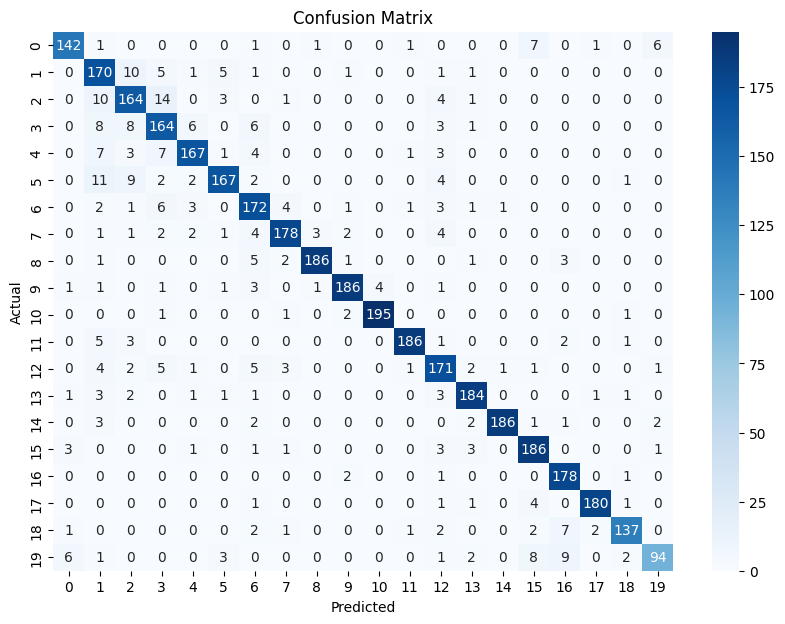

In [ ]:
test_texts = [
    "NASA discovers new exoplanet in the habitable zone.",
    "The car race yesterday was amazing.",
    "Python is a versatile programming language for data science.",
    "Pope Francis is the Pope and head of the Catholic Church.",
    "But meanwhile: what makes you think you can pass a single string to a function that expects an array of strings in space. Astonout riding a pig on the moon? Nnca hokey play on finland ice ",
    "Dementia describes various symptoms of cognitive decline, like forgetfulness and difficulty communicating. Dementia is a symptom of several underlying conditions and brain disorders, including Alzheimer’s disease.",
    "AMD presented several benchmarks that obviously cast it in the best light. Still, some of the comparisons are pretty damning: In Forza Horizon 5, for example, AMD said it can achieve 135 frames per second at 1080p resolution, at Medium settings."
]

for text in test_texts:
    predicted_category = grid.predict([preprocess_text(text)])
    category_name = newsgroups.target_names[predicted_category[0]]
    print(f'Test Text: "{text}"\nPredicted Category: "{category_name}"\n')

Test Text: "*NASA discovers new exoplanet in the habitable zone*."
Predicted Category: "`sci.space`"

Test Text: "*The car race yesterday was amazing.*"
Predicted Category: "`rec.autos`"

Test Text: "*Python is a versatile programming language for data science.*"
Predicted Category: "`sci.space`"

Test Text: "*Pope Francis is the Pope and head of the Catholic Church.*"
Predicted Category: "`soc.religion.christian`"

Test Text: "*But meanwhile: what makes you think you can pass a single string to a function that expects an array of strings in space. Astonout riding a pig on the moon? Nnca hokey play on finland ice* "
Predicted Category: "`sci.space`"

Test Text: "*Dementia describes various symptoms of cognitive decline, like forgetfulness and difficulty communicating. Dementia is a symptom of several underlying conditions and brain disorders, including Alzheimer’s disease.*"
Predicted Category: "`sci.med`"

Test Text: "*AMD presented several benchmarks that obviously cast it in the best light. Still, some of the comparisons are pretty damning: In Forza Horizon 5, for example, AMD said it can achieve 135 frames per second at 1080p resolution, at Medium settings.*"
Predicted Category: "`comp.sys.ibm.pc.hardware`"

**Let's cluster text**

In [ ]:
# =====================================================
# 20 Newsgroups: Find near-duplicate / spam-like clusters
# =====================================================


from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD


texts = newsgroups_data['text']
true_labels = newsgroups_data['target']
print(f"Loaded {len(texts)} documents")

# 2. Very aggressive vectorizer — perfect for catching near-duplicates
vectorizer = TfidfVectorizer(
    ngram_range=(1,3),          # trigrams catch entire spam sentences!
    max_features=20000,
    min_df=3,
    stop_words='english',
    lowercase=True
)

X_tfidf = vectorizer.fit_transform(texts)
print(f"TF-IDF shape: {X_tfidf.shape} → vocabulary size: {len(vectorizer.get_feature_names_out())}")

# ================================
# 3. Truncated SVD / LSA (the magic step)
# ================================
# 300–1000 components is the sweet spot for clustering text
n_components = 600          # start with 600, try 400–800 depending on your data size

svd = TruncatedSVD(
    n_components=n_components,
    n_iter=15,              # more iterations = better approximation
    random_state=42
)

X_reduced = svd.fit_transform(X_tfidf)

print(f"After SVD     : {X_reduced.shape}")
print(f"Explained variance ratio (sum of top {n_components}): {svd.explained_variance_ratio_.sum():.4f}")
# → usually 0.70–85% with 600 components on real datasets

# 4. Cluster into many small clusters (100–300 works great)
n_clusters = 100
kmeans = MiniBatchKMeans(
    n_clusters=n_clusters,
    batch_size=2048,
    max_iter=1000,
    random_state=42,
    n_init='auto'
)

cluster_labels = kmeans.fit_predict(X_reduced)

# 5. Show the biggest clusters (these are often near-duplicate posts!)
cluster_sizes = np.bincount(cluster_labels)
largest_clusters = np.argsort(cluster_sizes)[::-1]

print("\n" + "="*60)
print("TOP 50 LARGEST CLUSTERS (potential near-duplicates / spam)")
print("="*60)

for rank, cluster_id in enumerate(largest_clusters[:40], 1):
    size = cluster_sizes[cluster_id]
    percentage = 100 * size / len(texts)

    print(f"\n#{rank} Cluster {cluster_id} → {size} docs ({percentage:.2f}%)")

    # Show 3 example documents from this cluster
    indices = np.where(cluster_labels == cluster_id)[0][:3]
    for i, idx in enumerate(indices, 1):
        text = texts[idx]
        preview = text.replace('\n', ' ').replace('\r', ' ')[:220]
        true_category = newsgroups.target_names[true_labels[idx]]
        print(f"   {i}. [{true_category}] {preview}...")

In [ ]:
from sklearn.manifold import TSNE
sklearn_tsne = TSNE(n_components=2,
    perplexity=40,
    learning_rate='auto',
    max_iter=1000,
    random_state=42,
    init='pca',           # much more stable than 'random'
    metric='cosine',      # perfect for text data!
    verbose=1)

X_train_tsne = sklearn_tsne.fit_transform(X.toarray())

In [ ]:
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue=true_labels,
                palette=sns.color_palette("hls", 10)).set(title="20 News data T-SNE projection")

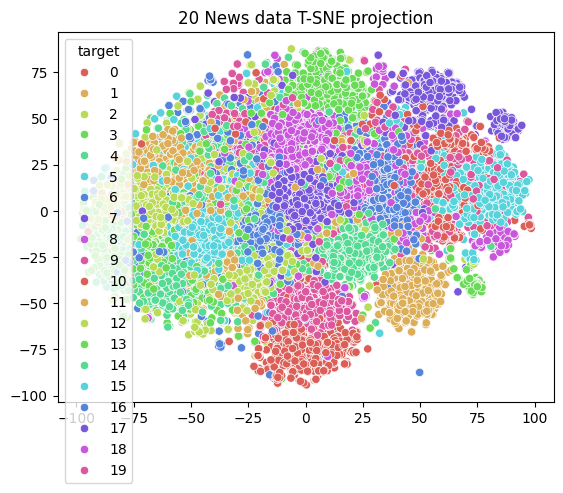